# This is a historical dataset on the modern Olympic games. It includes all the games from Athens 1896 to Rio 2016. It consists of 271116 rows and 15 columns.

To begin with, import pandas library to read the csv file.

In [3]:
import pandas as pd
data=pd.read_csv(r"C:\Users\Neha\Desktop\athlete_events.csv")
data[0:10]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


# Descripition of the dataset  
       ID: stands for a unique number for each athelete.
       Name: stands for the athelete's name.
       Sex: M or F
       Age: stands for the athelete's age in integer.
       Height: stands for the athelete's height in cm unit.
       Weight: stands for the athelete's weight in kg unit.
       Team: stands for the athelete's nationality which he/she represent.
       NOC: stands for National Olympic Committe which is a 3 letter code.
       Game: stands for year and season which the athelete participated at.
       Year: stands for the year of the event the athelete participated at.
       Season: Winter or Summer
       City: stands for the hoist city the event was conducted at.
       Sport: stands for sport athelete participated at.
       Event: stands for which category of event the atheltete particpated in the sport.
       Medal: stands for the medal the athelete recieved if any.

# Data Cleaning
Check for any missing data.

In [4]:
any(data.isnull())

True

In [5]:
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [6]:
any(data['ID'].isnull())

False

In [7]:
any(data['Name'].isnull())

False

Column ID, Name and Sex similarily have got no missing values.

In [8]:
any(data['Age'].isnull())

True

In [9]:
data['Age'].isnull().sum()

9474

Column Age has got 9474 missing values. 
To deal with them, we shall replace the missing NaN values by the mode.

In [10]:
mean=data['Age'].mean()
data['Age'].fillna(mean, inplace=True)

In [11]:
any(data['Age'].isnull())

False

In [12]:
data['Age'].isnull().sum()

0

Column Age is replaced successfully, now similarily replace the NaN values from column Height and Weight with mean as its represents the entire dataset.

In [13]:
mean=data['Height'].mean()
data['Height'].fillna(mean,inplace=True)
any(data['Height'].isnull())

False

In [14]:
mean=data['Weight'].mean()
data['Weight'].fillna(mean,inplace=True)
data['Weight']
any(data['Weight'].isnull())

False

Since we choose a dataset on the modern olympics and particularily want to deal with the atheletes who have bagged a medal. We shall drop all the NaN values from column medal.

In [15]:
data=data.dropna()

In [16]:
data.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

# Graphical Visualisation

Trying to visualise the dataset using various techniques to draw conclusions

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Box plots

Text(0.5, 1.0, 'Box plot of weights')

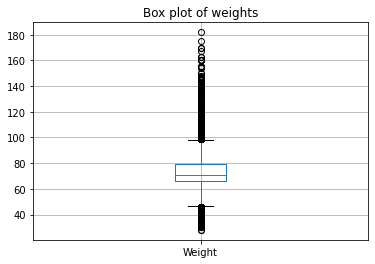

In [18]:
data.boxplot( column =['Weight'], grid = True)
plt.title("Box plot of weights")

In [19]:
weights = []
for i in data.index:
    weights.append(int(data["Weight"][i]))
print("Highest weight:",max(weights))
print("Lowest weight:",min(weights))
print("Mean weight:",(sum(weights))/(len(weights)))

Highest weight: 182
Lowest weight: 28
Mean weight: 72.88402081291004


Text(0.5, 1.0, 'Box plot of heights')

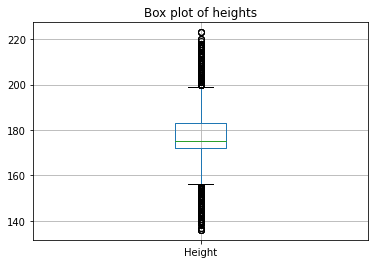

In [20]:
data.boxplot( column =['Height'], grid = True)
plt.title("Box plot of heights")

In [21]:
heights = []
for i in data.index:
    heights.append(int(data["Height"][i]))
print("Highest height:",max(heights))
print("Lowest height:",min(heights))
print("Mean height:",(sum(heights))/(len(heights)))

Highest height: 223
Lowest height: 136
Mean height: 176.99492245431466


# Proportions of medals in top 3 countries - Pie Chart

To find the top 10 countries with the highest aggregate of medals

In [22]:
data['Team'].value_counts().head(10)

United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Italy            1527
Sweden           1434
Australia        1306
Canada           1243
Hungary          1127
Name: Team, dtype: int64

In [23]:
print("Total medals of top 3 countries")
data['Team'].value_counts().head(3)

Total medals of top 3 countries


United States    5219
Soviet Union     2451
Germany          1984
Name: Team, dtype: int64

UNITED STATES
Number of Gold, Silver and Bronze medals: [2474, 1512, 1233]


Text(0.5, 1.0, 'Medals proportion of the United States')

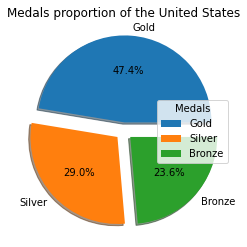

In [24]:
medals = [0,0,0]
print("UNITED STATES")
for i in data.index:
    if data['Team'][i] == "United States":
        if data['Medal'][i] == "Gold":
            medals[0] = medals[0]+1
        elif data['Medal'][i] == "Silver":
            medals[1] = medals[1]+1
        elif data['Medal'][i] == "Bronze":
            medals[2] = medals[2]+1
print ("Number of Gold, Silver and Bronze medals:",medals)

medals = np.array(medals)
label = ["Gold", "Silver", "Bronze"]
myexplode = [0.1, 0.1, 0.1]
plt.pie(medals, explode = myexplode, labels = label, shadow = True, autopct='%1.1f%%')
plt.legend(title = "Medals", loc = 5)
plt.title("Medals proportion of the United States")

SOVIET UNION
Number of Gold, Silver and Bronze medals: [1058, 716, 677]


Text(0.5, 1.0, 'Medals proportion of the Soviet Union')

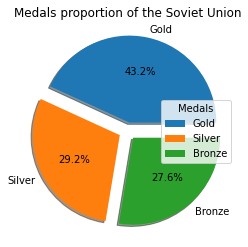

In [25]:
medals = [0,0,0]
print("SOVIET UNION")
for i in data.index:
    if data['Team'][i] == "Soviet Union":
        if data['Medal'][i] == "Gold":
            medals[0] = medals[0]+1
        elif data['Medal'][i] == "Silver":
            medals[1] = medals[1]+1
        elif data['Medal'][i] == "Bronze":
            medals[2] = medals[2]+1
print ("Number of Gold, Silver and Bronze medals:",medals)

medals = np.array(medals)
label = ["Gold", "Silver", "Bronze"]
myexplode = [0.1, 0.1, 0.1]
plt.pie(medals, explode = myexplode, labels = label, shadow = True, autopct='%1.1f%%')
plt.legend(title = "Medals", loc = 5)
plt.title("Medals proportion of the Soviet Union")

GERMANY
Number of Gold, Silver and Bronze medals: [679, 627, 678]


Text(0.5, 1.0, 'Medals proportion of the Germany')

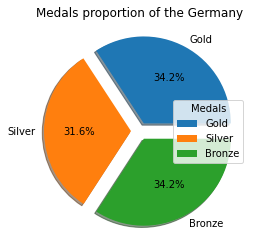

In [26]:
medals = [0,0,0]
print("GERMANY")
for i in data.index:
    if data['Team'][i] == "Germany":
        if data['Medal'][i] == "Gold":
            medals[0] = medals[0]+1
        elif data['Medal'][i] == "Silver":
            medals[1] = medals[1]+1
        elif data['Medal'][i] == "Bronze":
            medals[2] = medals[2]+1
print ("Number of Gold, Silver and Bronze medals:",medals)

medals = np.array(medals)
label = ["Gold", "Silver", "Bronze"]
myexplode = [0.1, 0.1, 0.1]
plt.pie(medals, explode = myexplode, labels = label,  shadow = True, autopct='%1.1f%%')
plt.legend(title = "Medals", loc = 5)
plt.title("Medals proportion of the Germany")

# Male-Female winners ratio in top 10 countries - stacked bar graph

In [27]:
data['Team'].value_counts().head(10)

United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Italy            1527
Sweden           1434
Australia        1306
Canada           1243
Hungary          1127
Name: Team, dtype: int64

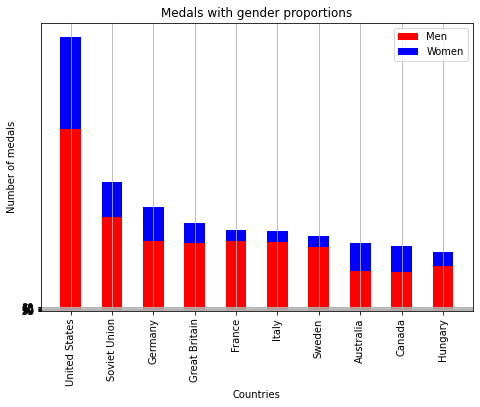

In [28]:
N = 10
men = [0,0,0,0,0,0,0,0,0,0]
women = [0,0,0,0,0,0,0,0,0,0]
countries = ['United States','Soviet Union','Germany','Great Britain','France','Italy','Sweden','Australia','Canada','Hungary']
for j in range(10):
    for i in data.index:
        if (data["Team"][i]==countries[j]) and (data["Sex"][i]=="M"):
            men[j] = men[j]+1
        elif (data["Team"][i]==countries[j]) and (data["Sex"][i]=="F"):
            women[j] = women[j]+1

ind = np.arange(10) # the x locations for the groups
width = 0.5
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, men, width, color='r')
ax.bar(ind, women, width,bottom=men, color='b')
ax.set_ylabel('Number of medals')
ax.set_xlabel('Countries')
ax.set_title('Medals with gender proportions')
plt.xticks(ind, ('United States','Soviet Union','Germany','Great Britain','France','Italy','Sweden','Australia','Canada','Hungary'),rotation = 90)
ax.grid()
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Men', 'Women'])
plt.show()



# Number of medals won - Line graph

To find the athlete with the highest aggregate of medals

data['Name'].value_counts().head(10)

In [29]:
gold = {}
silver = {}
bronze = {}
for i in range(1896,2017,4):
    gold[i]=0
for i in range(1896,2017,4):
    silver[i]=0
for i in range(1896,2017,4):
    bronze[i]=0
for i in data.index:
    if data['Name'][i] == "Michael Fred Phelps, II":
        if data['Medal'][i] == "Gold":
            gold[data['Year'][i]] +=1
        elif data['Medal'][i] == "Silver":
            silver[data['Year'][i]] +=1
        elif data['Medal'][i] == "Bronze":
            bronze[data['Year'][i]] +=1
print("gold", gold)
print("silver", silver)
print("bronze", bronze)

gold {1896: 0, 1900: 0, 1904: 0, 1908: 0, 1912: 0, 1916: 0, 1920: 0, 1924: 0, 1928: 0, 1932: 0, 1936: 0, 1940: 0, 1944: 0, 1948: 0, 1952: 0, 1956: 0, 1960: 0, 1964: 0, 1968: 0, 1972: 0, 1976: 0, 1980: 0, 1984: 0, 1988: 0, 1992: 0, 1996: 0, 2000: 0, 2004: 6, 2008: 8, 2012: 4, 2016: 5}
silver {1896: 0, 1900: 0, 1904: 0, 1908: 0, 1912: 0, 1916: 0, 1920: 0, 1924: 0, 1928: 0, 1932: 0, 1936: 0, 1940: 0, 1944: 0, 1948: 0, 1952: 0, 1956: 0, 1960: 0, 1964: 0, 1968: 0, 1972: 0, 1976: 0, 1980: 0, 1984: 0, 1988: 0, 1992: 0, 1996: 0, 2000: 0, 2004: 0, 2008: 0, 2012: 2, 2016: 1}
bronze {1896: 0, 1900: 0, 1904: 0, 1908: 0, 1912: 0, 1916: 0, 1920: 0, 1924: 0, 1928: 0, 1932: 0, 1936: 0, 1940: 0, 1944: 0, 1948: 0, 1952: 0, 1956: 0, 1960: 0, 1964: 0, 1968: 0, 1972: 0, 1976: 0, 1980: 0, 1984: 0, 1988: 0, 1992: 0, 1996: 0, 2000: 0, 2004: 2, 2008: 0, 2012: 0, 2016: 0}


In [30]:
years = list(gold.keys())
g = list(gold.values())
s = list(silver.values())
b = list(bronze.values())
print(years)
print(g)
print (s)
print(b)

[1896, 1900, 1904, 1908, 1912, 1916, 1920, 1924, 1928, 1932, 1936, 1940, 1944, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 8, 4, 5]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]


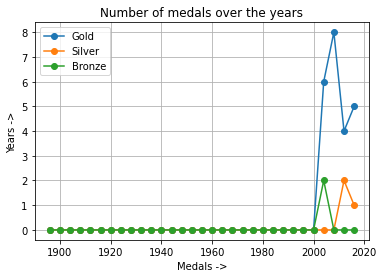

In [31]:
plt.plot(years,g, label='Gold', marker = 'o')
plt.plot(years,s, label='Silver', marker = 'o')
plt.plot(years,b, label='Bronze', marker = 'o')
plt.grid()
plt.title("Number of medals over the years")
plt.xlabel("Medals ->")
plt.ylabel("Years ->")
plt.legend()
plt.show()

# NORMALIZATION AND STANDARDISATION

In [32]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import norm

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
df=data[data.Year>=1995]
s=len(df)
df.index=range(0,s,1)
df.columns

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
data.var(axis=0)

In [ ]:
data.mean()

In [ ]:
np.std(data)

In [33]:
x = df[['Age','Height','Weight','Year']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)
df_normalized.columns =['Age','Height','Weight','Year']
df_normalized["Name"]=df.Name
df_normalized["Event"]=df.Event
df_normalized["Sex"]=df.Sex
df_normalized["Team"]=df.Team
df_normalized["NOC"]=df.NOC
df_normalized["Games"]=df.Games
df_normalized["Season"]=df.Season
df_normalized["City"]=df.City
df_normalized["Sport"]=df.Sport
df_normalized["Medal"]=df.Medal
df_normalized = df_normalized[['Name','Sex','Age','Height','Weight','Team','NOC','Games','Year','Season','City','Sport','Event','Medal']]
df_normalized

NameError: name 'df' is not defined

In [34]:
df_normalized.var()

NameError: name 'df_normalized' is not defined

In [35]:
df_normalized.mean()

NameError: name 'df_normalized' is not defined

In [36]:
scaler = preprocessing.StandardScaler()  # create the scaler object
scaleddata = scaler.fit_transform(df.select_dtypes(include=['float']))  # fit data on scaler object
scaleddata = pd.DataFrame(scaleddata)  # standardizes the data
print(scaleddata)

NameError: name 'preprocessing' is not defined

# HYPOTHESIS TESTING

Let's say you know the mean and standard deviation of a population. How can you tell if a sample is from this population or some other population? Although we may never know with 100% certainty, we can look for statistically significant differences between the sample statistics and the population paramters. This is done by first stating what is refered to as a null hypothesis, which in this scenario would be that there is no difference between the sample mean and the population mean. Then we look for statistical evidence to accept or reject the null hypothesis.

In [37]:
def z_test(data, tail, null_hypothesis_mean):
    from scipy.stats import norm
    x_bar= data.mean()
    sigma = data.std(ddof=0)
    mu=null_hypothesis_mean
    N = 40
    SE = sigma/np.sqrt(N)
    z_val = (x_bar - mu)/SE
    p_val=norm.cdf(z_val)
    print(z_val,p_val)
    if tail ==0:
        if p_val >= 0.05:
            return True
        else:
            return False
    elif tail == 1:
        if (1-p_val) >= 0.05:
            return True
        else:
            return False
    elif tail == 2:
        if (2*p_val) >= 0.05:
            return True
        else:
            return False

The athletes because of the training they do and being on their toes most of the time are fit and have less fat content in their body than an average human being. We wanted to see whether they are any different from an average human being because of the special training and diet they follow makes them leaner. 

Here 
H0: The mean weight of athletes is greater than or equal to average weight of human being(68kg) μ >= 68 ;
H1: The mean weight of athletes is lesser  than average weight of human being(68kg) μ < 68

Usually, statistical significance is associated with an alpha level of α = 0.05. We do a one-tailed test for 68kg.

In [38]:
z_test(data["Weight"],1,68)

2.419830115090449 0.9922361202386878


False

Since we get false result, we fail to reject H0: 
The mean weight of athletes is greater than or equal to average weight of human being(68kg) μ >= 68 
Thus special training and diet doesnt make them leaner but definitely keeps healthy and fit.

Here 
H0: The mean height of athletes is greater than or equal to average height of human being(170cm) μ >= 170 ;
H1: The mean height of athletes is lesser than average height of human being(170cm) μ < 170

Usually, statistical significance is associated with an alpha level of α = 0.05. We do a one-tailed test for 170cm.

In [39]:
z_test(data["Height"],1,170)

4.62311131507761 0.9999981098663565


False

Since we get false result, we fail to reject H0: 
The mean height of athletes is greater than or equal to average height of human being(170cm) μ >= 170 

Here 
H0: The mean age of athletes is greater than or equal to 27years: μ >= 27
H1: The mean age of athletes is lesser than 27years: μ < 27

Usually, statistical significance is associated with an alpha level of α = 0.05. We do a one-tailed test for the age 27

In [40]:
z_test(data["Age"],1,27)

-1.1674458795276428 0.12151517613965507


True

Since we get true result, we reject H0: 
The mean age of athletes is greater than or equal to 27years: μ >= 27

In [52]:
x_bar= data.mean()
x_bar

ID        69407.051806
Age          25.918399
Height      177.069144
Weight       73.051330
Year       1973.943845
dtype: float64

In [46]:
sigma = data.std(ddof=0)
sigma

ID        38849.492460
Age           5.859499
Height        9.670802
Weight       13.202338
Year         33.822432
dtype: float64

# CORRELATION 

Correlation is a statistical measure which determines co-relationship or association of two variables. It represents linear relationship between two variables.

In [41]:
from scipy.stats import pearsonr 

# Convert dataframe into series 
list1 = df['Height'] 
list2 = df['Weight'] 
  
# Apply the pearsonr() 
corr, _ = pearsonr(list1, list2) 
print('Pearsons correlation: %.3f' % corr)


Pearsons correlation: 0.805


In [42]:

# Convert dastaframe into series 
list1 = df['Age'] 
list2 = df['Weight'] 
  
# Apply the pearsonr() 
corr, _ = pearsonr(list1, list2) 
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.175


In [43]:
data.corr()

,ID,Age,Height,Weight,Year
ID,1.000000,0.000099,-0.011929,-0.005445,0.032561
Age,0.000099,1.000000,0.056997,0.108108,-0.086881
Height,-0.011929,0.056997,1.000000,0.791071,0.092871
Weight,-0.005445,0.108108,0.791071,1.000000,0.074167
Year,0.032561,-0.086881,0.092871,0.074167,1.000000


<AxesSubplot:>

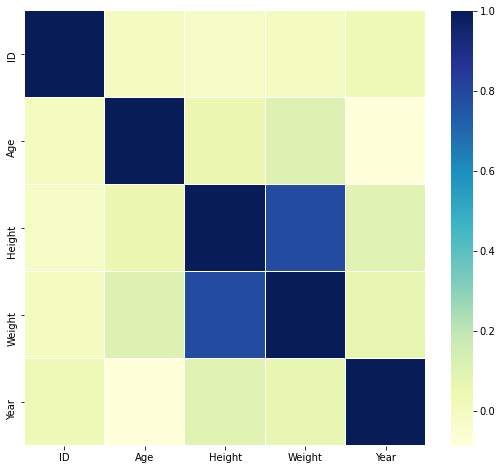

In [44]:
corrmat = data.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 


In [45]:
data['Year'].corr(data['Age'])

-0.08688056403639481

In [46]:
data['Year'].corr(data['Height'])

0.09287114252292569

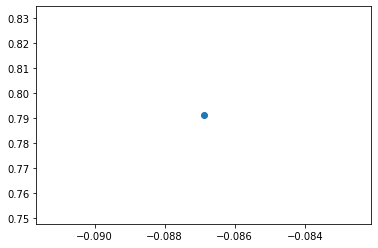

In [47]:
plt.scatter(data['Year'].corr(data['Age']),data['Height'].corr(data['Weight']))

<ipython-input-57-3fc9e5aa29b7>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label)
<ipython-input-57-3fc9e5aa29b7>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(label)


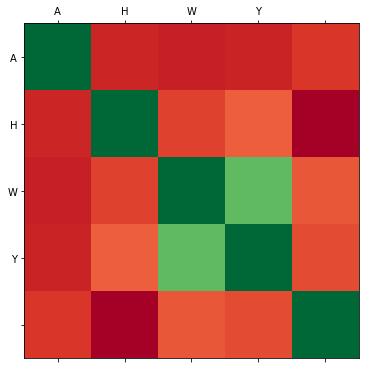

In [57]:
corrmat = data.corr() 
label=[i[:1] for i in corrmat.columns]

fig=plt.figure(figsize=(6,12))
ax=fig.add_subplot(111)
ax.set_yticklabels(label)
ax.set_xticklabels(label)
ax.matshow(corrmat,cmap=plt.cm.RdYlGn)
